In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chinese-mnist/chinese_mnist.csv
/kaggle/input/chinese-mnist/chinese_mnist.tfrecords
/kaggle/input/chinese-mnist/data/data/input_3_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_29_9_14.jpg
/kaggle/input/chinese-mnist/data/data/input_86_3_5.jpg
/kaggle/input/chinese-mnist/data/data/input_67_10_4.jpg
/kaggle/input/chinese-mnist/data/data/input_35_4_4.jpg
/kaggle/input/chinese-mnist/data/data/input_58_7_5.jpg
/kaggle/input/chinese-mnist/data/data/input_49_4_9.jpg
/kaggle/input/chinese-mnist/data/data/input_1_1_12.jpg
/kaggle/input/chinese-mnist/data/data/input_86_1_9.jpg
/kaggle/input/chinese-mnist/data/data/input_71_3_8.jpg
/kaggle/input/chinese-mnist/data/data/input_32_2_3.jpg
/kaggle/input/chinese-mnist/data/data/input_71_1_13.jpg
/kaggle/input/chinese-mnist/data/data/input_87_2_12.jpg
/kaggle/input/chinese-mnist/data/data/input_63_1_10.jpg
/kaggle/input/chinese-mnist/data/data/input_71_10_2.jpg
/kaggle/input/chinese-mnist/data/data/input_22_10_4.jpg
/kaggle/input/c

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

1. 데이터 확인하기

In [3]:
data_dir = '../input/chinese-mnist/data/data' # jpg 형식의 data 불러오기

In [4]:
mnist=pd.read_csv('../input/chinese-mnist/chinese_mnist.csv')
mnist

suite_id  sample_id  code  value character
0             1          1    10      9         九
1             1         10    10      9         九
2             1          2    10      9         九
3             1          3    10      9         九
4             1          4    10      9         九
...         ...        ...   ...    ...       ...
14995        99          5     9      8         八
14996        99          6     9      8         八
14997        99          7     9      8         八
14998        99          8     9      8         八
14999        99          9     9      8         八

[15000 rows x 5 columns]

In [5]:
Name=sorted(mnist['value'].unique()) # 어떤 value들이 존재하는지 check
Name

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000, 10000, 100000000]

2. 자료 가공하기

In [6]:
n=len(Name)
print(n)

# Name에 들어있는 값들에 대해 value mapping 해주기
N=[]
for i in range(n):
    N+=[i]
    
normal_mapping=dict(zip(Name,N )) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

print(normal_mapping)

15
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 100: 11, 1000: 12, 10000: 13, 100000000: 14}


In [7]:
datax0=[]
dataf0=[]
# tqdm은 상태 진행율을 보여줌. jpg 형식의 파일을 'img_to_array'로 array로 만들어주기
for im in tqdm(os.listdir(data_dir)):
    image=load_img(os.path.join(data_dir,im), grayscale=False, color_mode='rgb', target_size=(64,64))
    image=img_to_array(image)
    image=image/255.0 # 정규화
    datax0+=[image] # 64 x 64 형태의 array
    dataf0+=[im] # 파일의 이름

100%|██████████| 15000/15000 [01:02<00:00, 239.39it/s]


In [8]:
dataf1=[]
for item in dataf0:
    dataf1+=[int(item[0:-4].split('_')[3])-1] # 파일의 이름을 split 해서 'label' 파일 생성

In [9]:
m=len(datax0)
M=[]
for i in range(m):
    M+=[i]
random.shuffle(M) # image file의 index random shuffle 해주기
m

15000

In [10]:
datax2=np.array(datax0)
dataf2=np.array(dataf1)

# 3:1 비율로 train과 test set 나눠주기
trainx0=datax2[M[0:(m//4)*3]] # // 연산자 -> 몫 찾아주는 연산자
testx0=datax2[M[(m//4)*3:]]
trainy0=dataf2[M[0:(m//4)*3]]
testy0=dataf2[M[(m//4)*3:]]

In [11]:
trainy1=to_categorical(trainy0) # one-hot encoding
#testy1=to_categorical(testy0)

In [12]:
Trainx1=np.array(trainx0)
Trainy1=np.array(trainy1)
Testx1=np.array(testx0)
#Testy1=np.array(testy1)

In [13]:
trainx,testx,trainy,testy=train_test_split(Trainx1,Trainy1,test_size=0.2,random_state=44)

In [14]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(9000, 64, 64, 3)
(2250, 64, 64, 3)
(9000, 15)
(2250, 15)


In [15]:
# data augmentation function
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

3. Model1 - DenseNet201

In [16]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(64,64,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74842112/74836368 [==============================] - 0s 0us/step


In [17]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(15, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=40)

Epoch 1/40
282/282 [==============================] - 34s 72ms/step - loss: 1.4863 - accuracy: 0.5115 - val_loss: 0.6195 - val_accuracy: 0.7756
Epoch 2/40
282/282 [==============================] - 17s 58ms/step - loss: 0.6242 - accuracy: 0.7791 - val_loss: 0.5160 - val_accuracy: 0.8342
Epoch 3/40
282/282 [==============================] - 16s 55ms/step - loss: 0.5144 - accuracy: 0.8248 - val_loss: 0.4159 - val_accuracy: 0.8591
Epoch 4/40
282/282 [==============================] - 16s 58ms/step - loss: 0.4762 - accuracy: 0.8323 - val_loss: 0.3115 - val_accuracy: 0.9013
Epoch 5/40
282/282 [==============================] - 15s 55ms/step - loss: 0.4117 - accuracy: 0.8539 - val_loss: 0.3253 - val_accuracy: 0.8902
Epoch 6/40
282/282 [==============================] - 16s 58ms/step - loss: 0.4113 - accuracy: 0.8526 - val_loss: 0.2991 - val_accuracy: 0.8951
Epoch 7/40
282/282 [==============================] - 16s 56ms/step - loss: 0.3724 - accuracy: 0.8674 - val_loss: 0.3395 - val_accuracy:

In [20]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       126
           1       0.99      0.98      0.99       140
           2       0.95      0.87      0.91       167
           3       0.89      0.96      0.93       164
           4       0.99      0.88      0.93       160
           5       0.93      0.98      0.95       162
           6       0.95      0.96      0.95       140
           7       0.98      0.90      0.94       137
           8       0.99      0.99      0.99       171
           9       0.91      0.83      0.87       138
          10       0.98      0.88      0.93       156
          11       0.84      0.95      0.89       154
          12       0.85      0.95      0.90       152
          13       0.91      0.79      0.84       149
          14       0.81      0.93      0.87       134

    accuracy                           0.92      2250
   macro avg       0.93      0.92      0.92      2250
weighted avg       0.93   

평가1: 50 x 50에서 64 x 64로 크기를 키웠더니 0.80에서 0.9467까지 상승

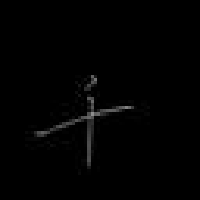

In [21]:
img0='../input/chinese-mnist/data/data/input_100_1_13.jpg'
load_img(img0,target_size=(200,200))

In [22]:
image=load_img(img0,target_size=(64,64))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

In [23]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
pred_name=mapper(value)
name0=img0[0:-4].split('_')[3]
name=mapper(int(name0)-1)
print("Prediction is {}.".format(pred_name))
print("Answer is {}.".format(name))

Prediction is 1000.
Answer is 1000.


3. Model2 - 

In [24]:
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(128, 3,
                                 padding = "same", 
                                 activation = "relu", 
                                 input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = 2))

model.add(tf.keras.layers.Conv2D(128, 3,
                                 padding = "same", 
                                 activation = "relu", 
                                 input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dropout())
model.add(tf.keras.layers.Dense(128,activation = "relu"))
model.add(tf.keras.layers.Dense(trainy.shape[1],activation = "softmax"))
model.compile(optimizer='adam',
              loss = "categorical_crossentropy", 
              metrics = ['accuracy'])  

In [26]:
history = model.fit(trainx,trainy,validation_data=(testx,testy),epochs=20)

Epoch 1/20
282/282 [==============================] - 17s 57ms/step - loss: 1.4634 - accuracy: 0.5427 - val_loss: 0.3709 - val_accuracy: 0.8804
Epoch 2/20
282/282 [==============================] - 16s 55ms/step - loss: 0.2576 - accuracy: 0.9148 - val_loss: 0.1818 - val_accuracy: 0.9480
Epoch 3/20
282/282 [==============================] - 16s 55ms/step - loss: 0.0830 - accuracy: 0.9731 - val_loss: 0.1981 - val_accuracy: 0.9418
Epoch 4/20
282/282 [==============================] - 16s 55ms/step - loss: 0.0456 - accuracy: 0.9841 - val_loss: 0.1807 - val_accuracy: 0.9498
Epoch 5/20
282/282 [==============================] - 16s 55ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.1708 - val_accuracy: 0.9489
Epoch 6/20
282/282 [==============================] - 16s 55ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.1891 - val_accuracy: 0.9596
Epoch 7/20
282/282 [==============================] - 16s 55ms/step - loss: 0.0156 - accuracy: 0.9957 - val_loss: 0.1949 - val_accuracy:

In [27]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       126
           1       0.99      0.99      0.99       140
           2       0.93      0.96      0.94       167
           3       0.96      0.93      0.95       164
           4       0.98      0.97      0.98       160
           5       0.98      1.00      0.99       162
           6       0.98      0.97      0.97       140
           7       0.97      0.99      0.98       137
           8       0.99      0.99      0.99       171
           9       0.98      0.92      0.95       138
          10       0.97      0.95      0.96       156
          11       0.97      0.95      0.96       154
          12       0.95      0.97      0.96       152
          13       0.97      0.97      0.97       149
          14       0.96      0.99      0.97       134

    accuracy                           0.97      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.97   